In [83]:
import warnings
warnings.filterwarnings('ignore')

#General Data/Plotting
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from tqdm.auto import tqdm 
import random

# Language
import nltk 
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 
import re 
from collections import Counter
from string import punctuation

# Modeling
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split 
from sklearn.metrics import precision_score, recall_score , f1_score, accuracy_score,confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


import tensorflow as tf 
from tensorflow import keras 
from tensorflow.keras.preprocessing.text import Tokenizer 
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import Sequential 
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.layers import Dense , Embedding , Bidirectional , LSTM

lemma = WordNetLemmatizer()

In [84]:
df = pd.read_json('../Datasets/Cell_Phones_and_Accessories_5.json', lines=True)

In [85]:
df['helpful_0'] = df['helpful'].apply(func=lambda x: x[0])
df['helpful_1'] = df['helpful'].apply(func=lambda x: x[1])


In [86]:
# Remove Reviews that have less than 2 helpful votes
df = df[df['helpful_1'] >= 2]
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,helpful_0,helpful_1
3,AWJ0WZQYMYFQ4,120401325X,JM,"[4, 4]",Item arrived in great time and was in perfect ...,4,Cute!,1382313600,"10 21, 2013",4,4
4,ATX7CZYFXI1KW,120401325X,patrice m rogoza,"[2, 3]","awesome! stays on, and looks great. can be use...",5,leopard home button sticker for iphone 4s,1359849600,"02 3, 2013",2,3
5,APX47D16JOP7H,120401325X,RLH,"[1, 2]",These make using the home button easy. My daug...,3,Cute,1381536000,"10 12, 2013",1,2
7,A6FGO4TBZ3QFZ,3998899561,Abdullah Albyati,"[1, 2]",it worked for the first week then it only char...,1,not a good Idea,1384992000,"11 21, 2013",1,2
8,A2JWEDW5FSVB0F,3998899561,Adam,"[2, 3]","Good case, solid build. Protects phone all aro...",5,Solid Case,1380067200,"09 25, 2013",2,3


In [87]:
df['helpful_ratio'] = df['helpful_0'] / df['helpful_1']


In [88]:
df['ratio_percent'] = (df['helpful_ratio'] * 100).astype(int)
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,helpful_0,helpful_1,helpful_ratio,ratio_percent
3,AWJ0WZQYMYFQ4,120401325X,JM,"[4, 4]",Item arrived in great time and was in perfect ...,4,Cute!,1382313600,"10 21, 2013",4,4,1.000000,100
4,ATX7CZYFXI1KW,120401325X,patrice m rogoza,"[2, 3]","awesome! stays on, and looks great. can be use...",5,leopard home button sticker for iphone 4s,1359849600,"02 3, 2013",2,3,0.666667,66
5,APX47D16JOP7H,120401325X,RLH,"[1, 2]",These make using the home button easy. My daug...,3,Cute,1381536000,"10 12, 2013",1,2,0.500000,50
7,A6FGO4TBZ3QFZ,3998899561,Abdullah Albyati,"[1, 2]",it worked for the first week then it only char...,1,not a good Idea,1384992000,"11 21, 2013",1,2,0.500000,50
8,A2JWEDW5FSVB0F,3998899561,Adam,"[2, 3]","Good case, solid build. Protects phone all aro...",5,Solid Case,1380067200,"09 25, 2013",2,3,0.666667,66


In [89]:
df.drop(['reviewerID', 'asin', 'reviewerName', 'unixReviewTime', 'reviewTime'], axis='columns', inplace=True)

In [90]:
df.head()

,helpful,reviewText,overall,summary,helpful_0,helpful_1,helpful_ratio,ratio_percent
3,"[4, 4]",Item arrived in great time and was in perfect ...,4,Cute!,4,4,1.000000,100
4,"[2, 3]","awesome! stays on, and looks great. can be use...",5,leopard home button sticker for iphone 4s,2,3,0.666667,66
5,"[1, 2]",These make using the home button easy. My daug...,3,Cute,1,2,0.500000,50
7,"[1, 2]",it worked for the first week then it only char...,1,not a good Idea,1,2,0.500000,50
8,"[2, 3]","Good case, solid build. Protects phone all aro...",5,Solid Case,2,3,0.666667,66


In [91]:
df = df.rename(columns={"reviewText":"Review","overall": "Rating"})

df['review_len'] = [len(text.split()) for text in df.Review]
df.head()

,helpful,Review,Rating,summary,helpful_0,helpful_1,helpful_ratio,ratio_percent,review_len
3,"[4, 4]",Item arrived in great time and was in perfect ...,4,Cute!,4,4,1.000000,100,51
4,"[2, 3]","awesome! stays on, and looks great. can be use...",5,leopard home button sticker for iphone 4s,2,3,0.666667,66,23
5,"[1, 2]",These make using the home button easy. My daug...,3,Cute,1,2,0.500000,50,23
7,"[1, 2]",it worked for the first week then it only char...,1,not a good Idea,1,2,0.500000,50,20
8,"[2, 3]","Good case, solid build. Protects phone all aro...",5,Solid Case,2,3,0.666667,66,44


In [92]:
def convert_label(df) : 
    if df['ratio_percent'] <= 70 : 
        rate = 0 # for Negative 
    else : 
        rate = 1 # for Positive
        
    return rate

In [93]:
df['IsHelpful'] = df.apply(convert_label, axis = 1)
df.head()

,helpful,Review,Rating,summary,helpful_0,helpful_1,helpful_ratio,ratio_percent,review_len,IsHelpful
3,"[4, 4]",Item arrived in great time and was in perfect ...,4,Cute!,4,4,1.000000,100,51,1
4,"[2, 3]","awesome! stays on, and looks great. can be use...",5,leopard home button sticker for iphone 4s,2,3,0.666667,66,23,0
5,"[1, 2]",These make using the home button easy. My daug...,3,Cute,1,2,0.500000,50,23,0
7,"[1, 2]",it worked for the first week then it only char...,1,not a good Idea,1,2,0.500000,50,20,0
8,"[2, 3]","Good case, solid build. Protects phone all aro...",5,Solid Case,2,3,0.666667,66,44,0


In [94]:
# Drop reviews below 10 words
#df = df[~(df['review_len'] < 10)]

In [95]:
df.sort_values(by='ratio_percent', ascending=False, inplace=True)
df.head()

,helpful,Review,Rating,summary,helpful_0,helpful_1,helpful_ratio,ratio_percent,review_len,IsHelpful
3,"[4, 4]",Item arrived in great time and was in perfect ...,4,Cute!,4,4,1.0,100,51,1
168306,"[2, 2]",Lived up to expectations for battery life and ...,2,What's the point if they don't stay in your ears?,2,2,1.0,100,20,1
69446,"[4, 4]",The Droid 3 by Motorola was an excellent buy. ...,5,Motorola,4,4,1.0,100,42,1
69452,"[3, 3]",I was looking to find a replacement for my dro...,4,Good but not great.,3,3,1.0,100,89,1
69454,"[12, 12]",I bought this case because of the great review...,2,Near Impossible to remove,12,12,1.0,100,204,1


### Data Prepossessing :ghost:

In [96]:
def DataPrep(text) : 
    text = re.sub(r'\d+', '', text) # numbers
    text = re.sub(r'[^\w\s]', '', text) # special characters
    
    # tokenization 
    tokens = nltk.word_tokenize(text) 
    
    # remove puncs 
    punc = list(punctuation)
    words = [word for word in tokens if word not in punc]
    
    # remove stopwords 
    stop_words = set(stopwords.words('english'))
    words = [word.lower() for word in words if not word in stop_words]
    
    # lemmatization 
    words = [lemma.lemmatize(word) for word in words]
    
    text = ' '.join(words)
    
    return text

In [97]:
df['cleaned_reviews'] = df['Review'].apply(DataPrep)

In [98]:
df.head()

,helpful,Review,Rating,summary,helpful_0,helpful_1,helpful_ratio,ratio_percent,review_len,IsHelpful,cleaned_reviews
3,"[4, 4]",Item arrived in great time and was in perfect ...,4,Cute!,4,4,1.0,100,51,1,item arrived great time perfect condition howe...
168306,"[2, 2]",Lived up to expectations for battery life and ...,2,What's the point if they don't stay in your ears?,2,2,1.0,100,20,1,lived expectation battery life sound quality v...
69446,"[4, 4]",The Droid 3 by Motorola was an excellent buy. ...,5,Motorola,4,4,1.0,100,42,1,the droid motorola excellent buy it came ready...
69452,"[3, 3]",I was looking to find a replacement for my dro...,4,Good but not great.,3,3,1.0,100,89,1,i looking find replacement droid x i found one...
69454,"[12, 12]",I bought this case because of the great review...,2,Near Impossible to remove,12,12,1.0,100,204,1,i bought case great review i verizon galaxy ne...


In [99]:
print(f'There are around {int(df["cleaned_reviews"].duplicated().sum())} duplicated reviews, we will remove them.')

There are around 90 duplicated reviews, we will remove them.


In [100]:
df.drop_duplicates("cleaned_reviews", inplace=True)

### EDA

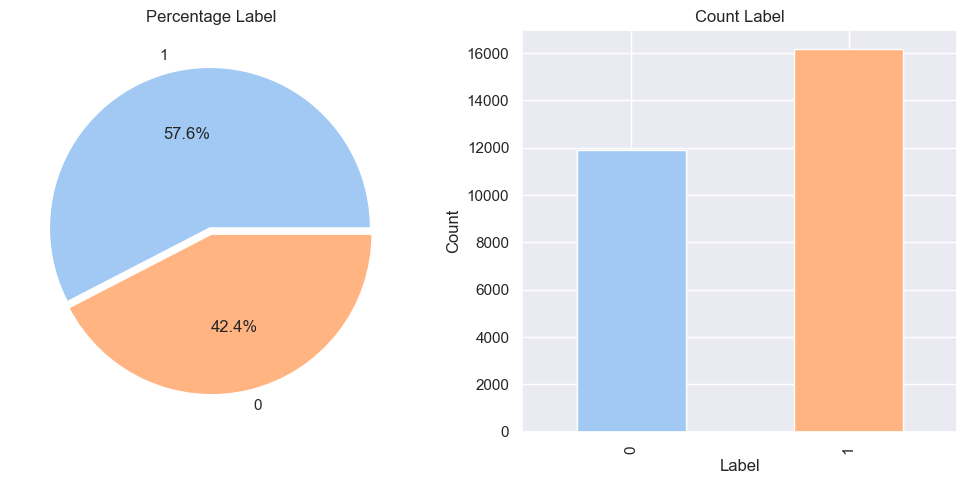

In [101]:
label_count = df['IsHelpful'].value_counts()
fig,axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

sns.set_theme(style='darkgrid', palette='pastel')
color = sns.color_palette(palette='pastel')
explode = [0.02]*len(label_count)

axes[0].pie(label_count.values, labels=label_count.index, autopct='%1.1f%%', colors=color, explode=explode)
axes[0].set_title('Percentage Label')

#sns.countplot(df['Rating'] , ax=axes[1])
counts = df['IsHelpful'].value_counts().sort_index()
counts.plot.bar(color=color)
axes[1].set_title('Count Label')
axes[1].set_xlabel('Label')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

### Split Data

In [124]:
x_train, x_val, y_train, y_val, len_train, len_val = train_test_split(df['cleaned_reviews'], df['IsHelpful'], df['review_len'], train_size=0.80, random_state=42)

In [125]:
len(x_train), len(x_val)

(22428, 5608)

### Feature Extraction

#### Was genau passiert hier?

In [126]:
vec = TfidfVectorizer()
vec.fit(x_train)
print("No. of feature words: ",len(vec.get_feature_names_out()))

No. of feature words:  79120


In [127]:
x_train = vec.transform(x_train).toarray()
x_val = vec.transform(x_val).toarray()

In [128]:
x_train.shape , x_val.shape

((22428, 79120), (5608, 79120))

In [131]:
# Add 'len' feature to the TF-IDF transformed data
x_train_combined = np.column_stack((x_train, len_train))
x_val_combined = np.column_stack((x_val, len_val))

In [135]:
print(x_train_combined)

[[  0.   0.   0. ...   0.   0.  43.]
 [  0.   0.   0. ...   0.   0.  42.]
 [  0.   0.   0. ...   0.   0.  26.]
 ...
 [  0.   0.   0. ...   0.   0. 178.]
 [  0.   0.   0. ...   0.   0.  98.]
 [  0.   0.   0. ...   0.   0.  24.]]


In [136]:
x_train_combined.shape, x_val_combined.shape

((22428, 79121), (5608, 79121))

### Logistic Regression

### LR mit Review+IsHelpful

In [144]:
lr = LogisticRegression(random_state=42)
lr.fit(x_train , y_train)

LogisticRegression(random_state=42)

In [145]:
train_acc1 = lr.score(x_train , y_train)

In [146]:
lr_pred = lr.predict(x_val)

val_acc1 = accuracy_score(y_val , lr_pred) 

val_precision1 = precision_score(y_val , lr_pred , average='weighted')
val_recall1 = recall_score(y_val , lr_pred , average='weighted')
val_f1score1 = f1_score(y_val , lr_pred , average='weighted')

In [147]:
print(f"The training accuracy for logistic regression : {(train_acc1*100):0.2f}%\n")
print(f"The validation accuracy for logistic regression : {(val_acc1*100):0.2f}%\n")
print(f"The precision for logistic regression : {val_precision1:0.2f}\n")
print(f"The recall for logistic regression : {val_recall1:0.2f}\n")
print(f"The f1 score for logistic regression : {val_f1score1:0.2f}\n")

The training accuracy for logistic regression : 74.71%

The validation accuracy for logistic regression : 62.64%

The precision for logistic regression : 0.62

The recall for logistic regression : 0.63

The f1 score for logistic regression : 0.61



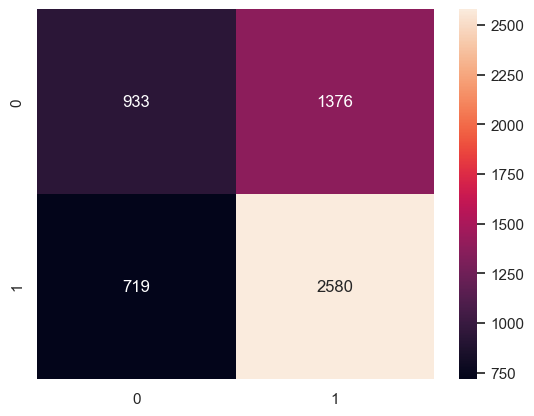

In [153]:
lr_cm = confusion_matrix(y_val , lr_pred)
sns.heatmap(lr_cm, annot=True,fmt='3g')
plt.show()

### LR mit Review+IsHelpful+Len

In [148]:
# Model mit review_len
lr1 = LogisticRegression(random_state=42)
lr1.fit(x_train_combined, y_train)

LogisticRegression(random_state=42)

In [149]:
train_acc1_2 = lr1.score(x_train_combined , y_train)

In [150]:
lr1_pred = lr1.predict(x_val_combined)

val_acc1_2 = accuracy_score(y_val , lr1_pred) 

val_precision1_2 = precision_score(y_val , lr1_pred , average='weighted')
val_recall1_2 = recall_score(y_val , lr1_pred , average='weighted')
val_f1score1_2 = f1_score(y_val , lr1_pred , average='weighted')

In [151]:
print(f"The training accuracy for logistic regression : {(train_acc1_2*100):0.2f}%\n")
print(f"The validation accuracy for logistic regression : {(val_acc1_2*100):0.2f}%\n")
print(f"The precision for logistic regression : {val_precision1_2:0.2f}\n")
print(f"The recall for logistic regression : {val_recall1_2:0.2f}\n")
print(f"The f1 score for logistic regression : {val_f1score1_2:0.2f}\n")

The training accuracy for logistic regression : 69.85%

The validation accuracy for logistic regression : 63.27%

The precision for logistic regression : 0.62

The recall for logistic regression : 0.63

The f1 score for logistic regression : 0.62



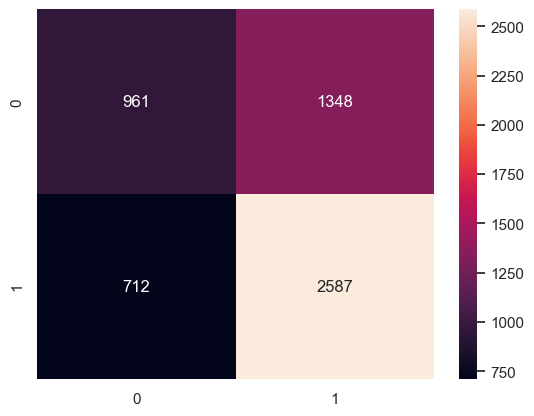

In [154]:
lr1_cm = confusion_matrix(y_val , lr1_pred)
sns.heatmap(lr1_cm, annot=True,fmt='3g')
plt.show()